Here we demonstrate simple cross-series prediction functionality, where the model is trained to use a sine series to predict a cosine series. This is obviously a trivial task, but it allows us to test that the permutations of feedback and bias are functional.

Some systems respond better or worse to the presence of a bias or feedback. In this instance, the predictions generally perform better without feedback, as it can cause numerical instability. In my experience, it has been rare to find an instance where it is actually beneficial to the model, but surely use-cases exist...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ESN_class_main import *

In [2]:
# Arbitrary signals.
np.random.seed(42)
time = np.linspace(0, 10, 10000)
current = np.sin(time) + 0.02 * np.random.randn(len(time))
voltage = np.cos(time) + 0.02 * np.random.randn(len(time))

# Normalize the signals.
current = (current - np.min(current)) / (np.max(current) - np.min(current))
voltage = (voltage - np.min(voltage)) / (np.max(voltage) - np.min(voltage))

# Train-test split.
train_length = 7000
test_length = 3000
u_train, u_test = current[:train_length], current[train_length:train_length + test_length]
y_train, y_test = voltage[:train_length], voltage[train_length:train_length + test_length]

# Reshape for ESN
u_train = u_train.reshape(1, -1)  # Input: current
y_train = y_train.reshape(1, -1)  # Target: voltage
u_test = u_test.reshape(1, -1)
y_test = y_test.reshape(1, -1)

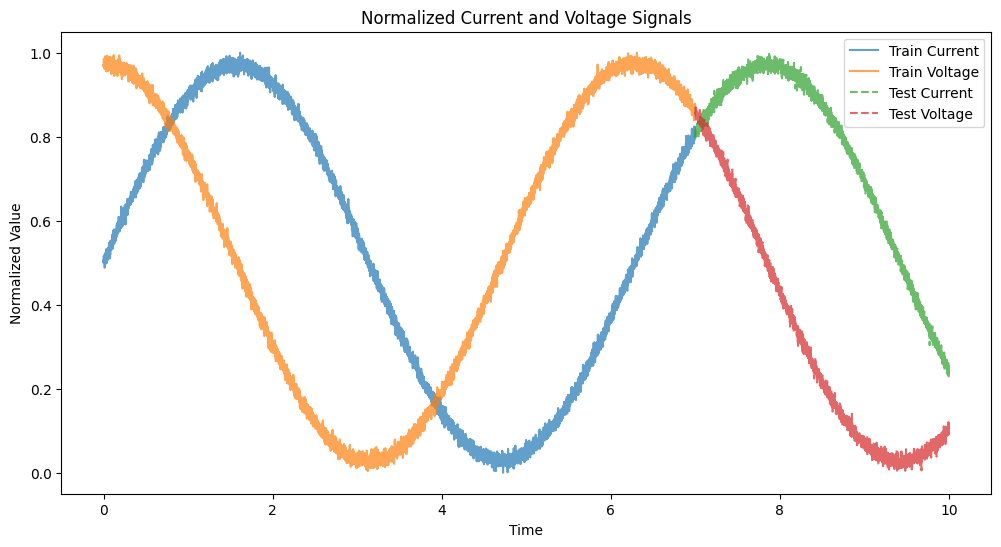

In [3]:
# Plotting the normalized signals.
plt.figure(figsize=(12, 6))
plt.plot(time[:train_length], u_train.flatten(), label="Train Current", alpha=0.7)
plt.plot(time[:train_length], y_train.flatten(), label="Train Voltage", alpha=0.7)
plt.plot(time[train_length:train_length + test_length], u_test.flatten(), label="Test Current", alpha=0.7, linestyle="--")
plt.plot(time[train_length:train_length + test_length], y_test.flatten(), label="Test Voltage", alpha=0.7, linestyle="--")
plt.title("Normalized Current and Voltage Signals")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()

In [4]:
print(f"u_train shape: {u_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"u_test shape: {u_test.shape}")
print(f"y_test shape: {y_test.shape}")

u_train shape: (1, 7000)
y_train shape: (1, 7000)
u_test shape: (1, 3000)
y_test shape: (1, 3000)


The spectral radius is the most definitive hyperparameter in this experiment.

In [189]:
# Initialize ESN parameters.
ESN_params = {
    'input_dim': 1,
    'output_dim': 1,
    'nodes': 100,
    'distribution': 'uniform',
    'leak': 0.9,
    'connectivity': 0.2,
    'input_scaling': np.array([0.01]).reshape(-1, 1),
    'spectral_radius': 0.95,
    'noise': 0.0001,
    'enable_feedback': False,
    'teacher_scaling': np.array([0.01]).reshape(-1, 1),
    'bias': False,
    'seed': 42
}

Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 2.788356006046262
Reservoir spectral radius scaled to: 0.9500000000045323
Reservoir weights spectral radius scaling completed.


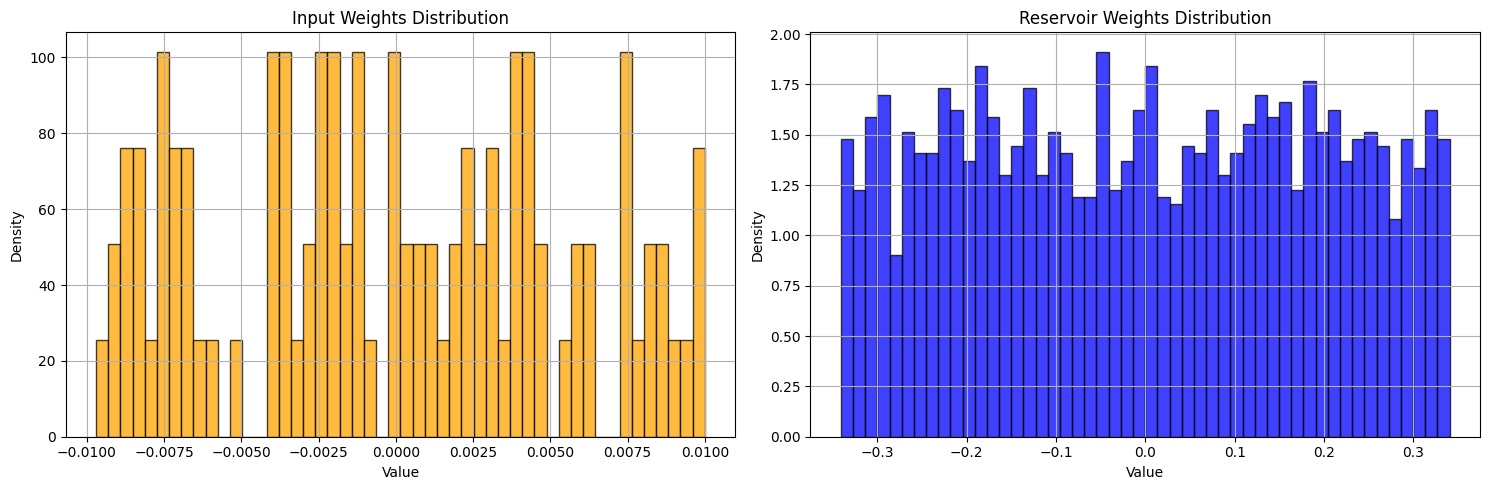


=== Matrix Shapes ===
Matrix         Shape               
-----------------------------------
W_res          (100, 100)          
W_in           (100, 1)            
W_fb           None                
Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (100, 100)
Network matrices uploaded to C:\Users\dafyd\PycharmProjects\pyESN-library\Generated_Weights


In [190]:
# Declaring and initialising the network.
esn = EchoStateNetwork(ESN_params, verbose=2)

# Initialize Reservoir
esn.initialize_reservoir()

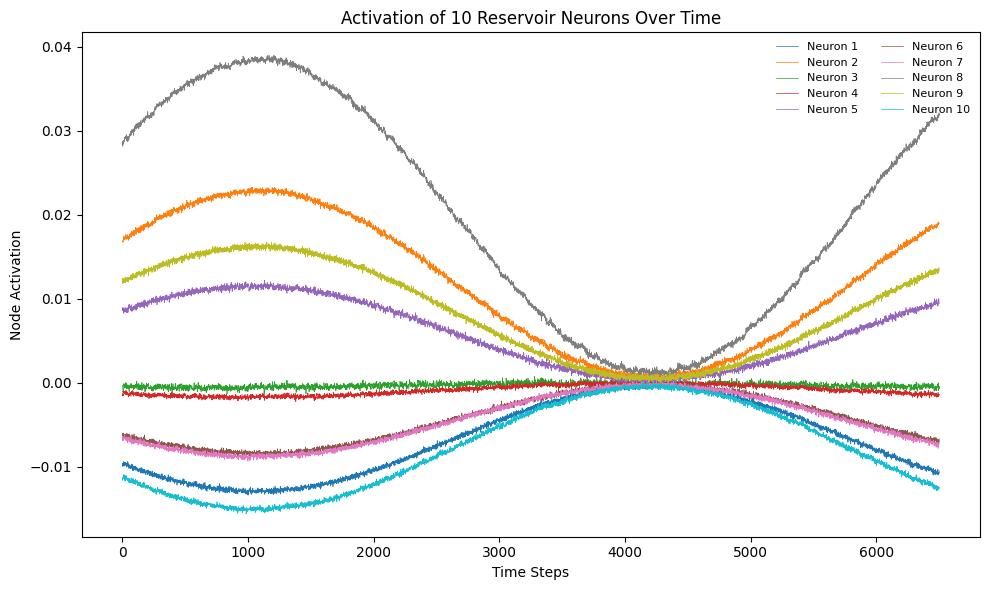

XX^T has shape: (101, 101)
YX^T has shape: (1, 101)


array([[ 0.00000000e+00, -1.72057613e-03, -2.34464270e-04, ...,
        -1.07221132e-02, -1.07703995e-02, -1.04832666e-02],
       [ 0.00000000e+00,  3.34127805e-03,  4.15289008e-03, ...,
         1.89879624e-02,  1.90297031e-02,  1.90042833e-02],
       [ 0.00000000e+00, -1.18072077e-05, -6.42185337e-04, ...,
        -4.81705584e-04, -7.25736189e-04, -4.35776921e-04],
       ...,
       [ 0.00000000e+00, -2.86799458e-03, -2.72874731e-03, ...,
        -2.28899944e-03, -2.11204954e-03, -1.89177565e-03],
       [ 0.00000000e+00, -1.63143228e-03, -2.26144042e-03, ...,
        -1.16601119e-02, -1.14109503e-02, -1.17391071e-02],
       [ 0.00000000e+00,  2.76291305e-03,  7.99003078e-03, ...,
         1.33475907e-04, -1.35172014e-04, -1.44168060e-04]],
      shape=(100, 7000))

In [191]:
# Perform state acquisition.
esn.acquire_reservoir_states(inputs=u_train, teachers=y_train, visualized_neurons=10, burn_in=500)

Readout weight matrix shape: (1, 101)


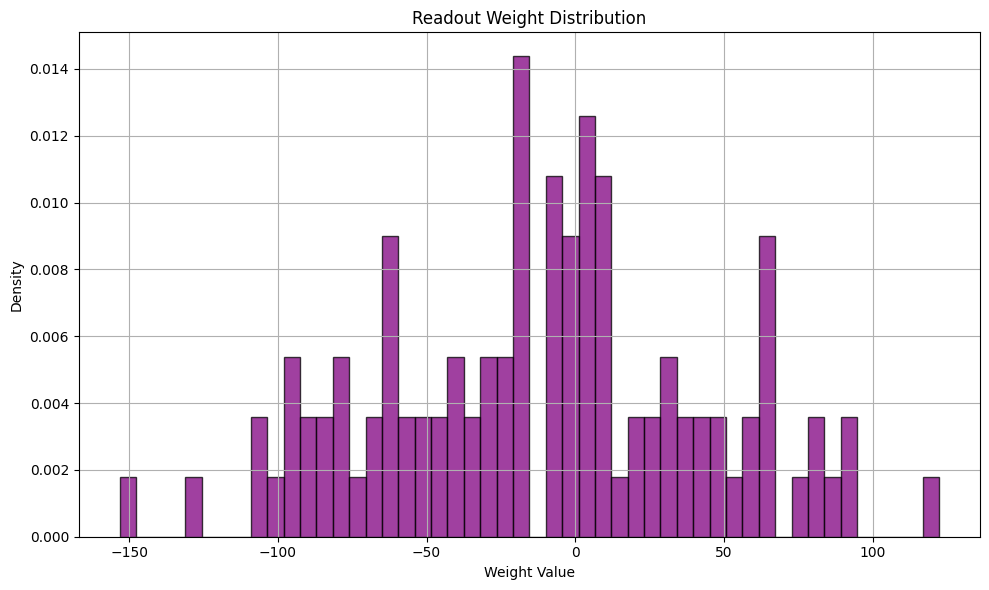

array([[   0.25344133,  -19.15478008,   10.362732  ,   -3.10434091,
         -33.88634312,   57.25683315,   65.04001882,  -20.11538671,
          21.47802651,  -20.06463498,   33.30187239,  -27.72532099,
          18.40626326,   80.19559429, -127.98789931,  -16.54309152,
           5.25461745,    9.98447806,  -62.23697304,   88.98215314,
          -6.83342971,   26.65864887,   94.54250738,    7.82378997,
          12.00767915,   74.17708583,   49.61287656,    3.35872956,
           8.33330833,   -8.47437451,   51.91153553,  -89.7520026 ,
         -42.63664851,    1.3062763 ,   31.4957761 ,  -80.20353232,
         -70.08216056,  -89.49633918,   -4.83931363,   15.90233498,
         -36.32509333,  -20.30134206,  -48.67220549,  -30.26523666,
          25.03031286, -153.17181026,    1.27895884,  -56.64360226,
          56.61384777,  -59.49059835,  -48.50203373,  -39.20375813,
         -63.98726151,   40.65770997,  -93.81110254,  -60.77524977,
          -1.53516384,   -2.75428797,  -98.23852

In [192]:
# Regression time!
ridge_param = 1e-6
esn.tikhonov_regression(ridge=ridge_param)

In [193]:
# Cross-Series Prediction
predicted, _ = esn.cross_series_prediction(input_signal=u_test, continuation=False)

As you can see, finding the right balance of these numerous hyperparameters can be challenging even for simple tasks.

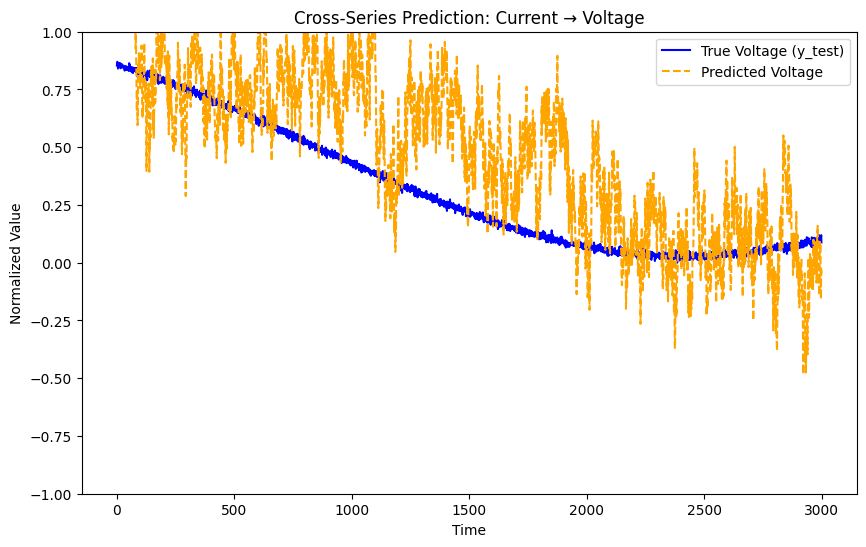

In [194]:
# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(y_test.flatten(), label="True Voltage (y_test)", color="blue", linewidth=1.5)
plt.plot(predicted.flatten(), label="Predicted Voltage", color="orange", linestyle="--", linewidth=1.5)
plt.legend()
plt.title("Cross-Series Prediction: Current → Voltage")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.ylim(-1, 1)
plt.show()

In [195]:
# Evaluate Performance
mse = np.mean((predicted.flatten() - y_test.flatten())**2)
print(f"Mean Squared Error: {mse:.6f}")

Mean Squared Error: 0.658849
